Content analysis (text, emoticons, image, audio, video) based social media analytics: Location analysis, Trend analysis, Hashtag popularity analysis, Sentiment analysis for given dataset, User engagement analysis. Analyze content types (text, emoticons, image, audio, video). Use techniques Sentiment analysis with Hugging face Transformers, Trend Analysis via time-series tools (e.g. Prophet) and Hashtag analysis using tools like hashtagify

TREND ANALYSIS

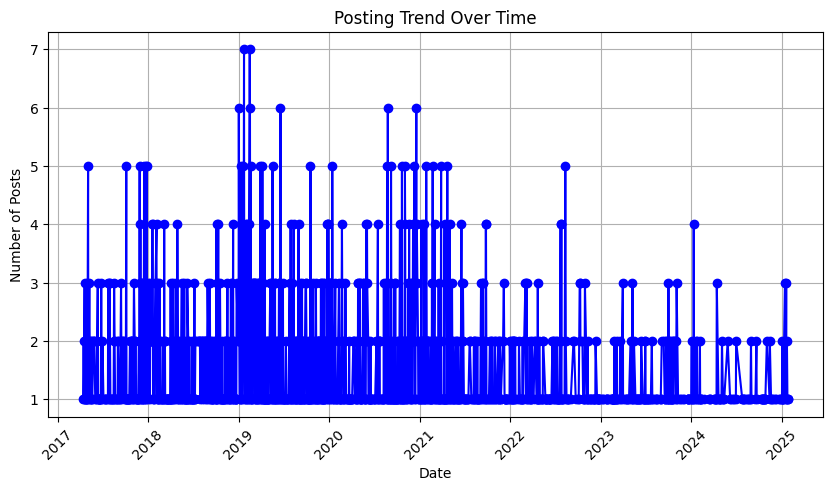

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("modified_data.csv")

# Convert published_at to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Group by date to count posts per day
df['date'] = df['published_at'].dt.date
trend_data = df.groupby('date').size()

# Plot trend over time
plt.figure(figsize=(10, 5))
plt.plot(trend_data.index, trend_data.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("Posting Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


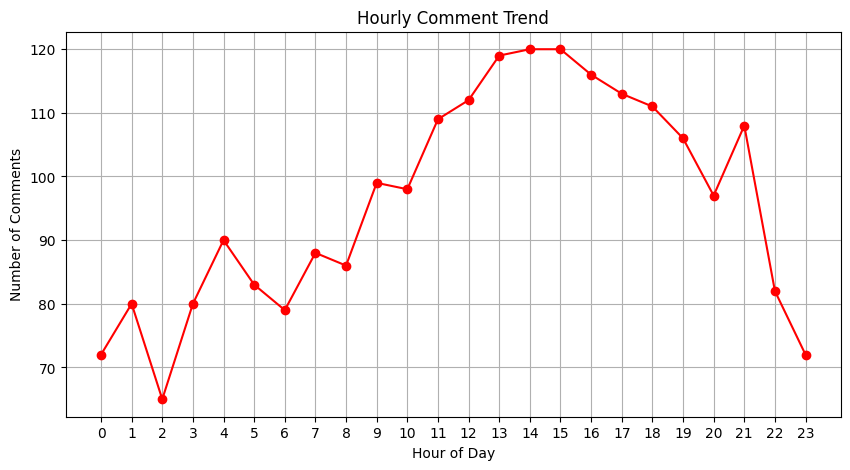

In [14]:
# Extract hour from timestamp
df['hour'] = df['published_at'].dt.hour

# Count comments per hour
hourly_trend = df.groupby('hour').size()

# Plot hourly comment trend
plt.figure(figsize=(10, 5))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Comments")
plt.title("Hourly Comment Trend")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


Hashtag Popularity Analysis

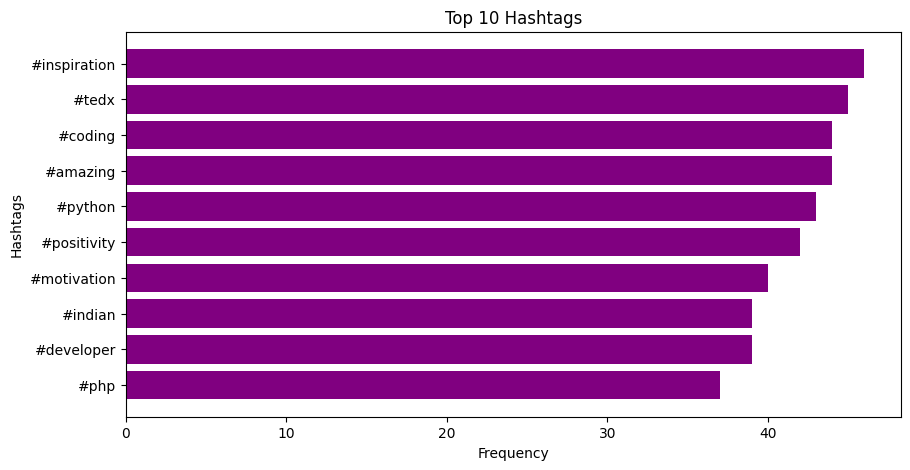

In [8]:
import re
from collections import Counter

# Extract hashtags from text
df['hashtags'] = df['text'].apply(lambda x: re.findall(r'#\w+', str(x)))

# Flatten list of hashtags and count occurrences
all_hashtags = [tag for sublist in df['hashtags'] for tag in sublist]
hashtag_counts = Counter(all_hashtags)

# Get top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
hashtags, counts = zip(*top_hashtags)

# Plot bar chart for top hashtags
plt.figure(figsize=(10, 5))
plt.barh(hashtags, counts, color='purple')
plt.xlabel("Frequency")
plt.ylabel("Hashtags")
plt.title("Top 10 Hashtags")
plt.gca().invert_yaxis()
plt.show()


Sentiment Analysis

<ipython-input-9-a08e9d31c7b4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment_label'], palette="viridis")


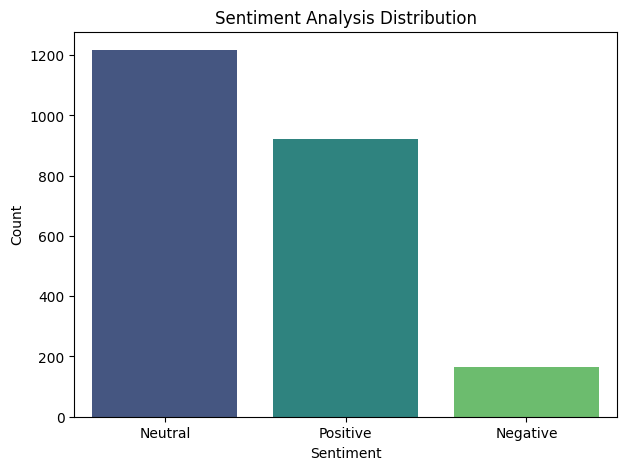

In [9]:
from textblob import TextBlob
import seaborn as sns

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['text'].apply(get_sentiment)

# Classify as Positive, Neutral, Negative
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot sentiment distribution
plt.figure(figsize=(7, 5))
sns.countplot(x=df['sentiment_label'], palette="viridis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.show()


User Engagement Analysis

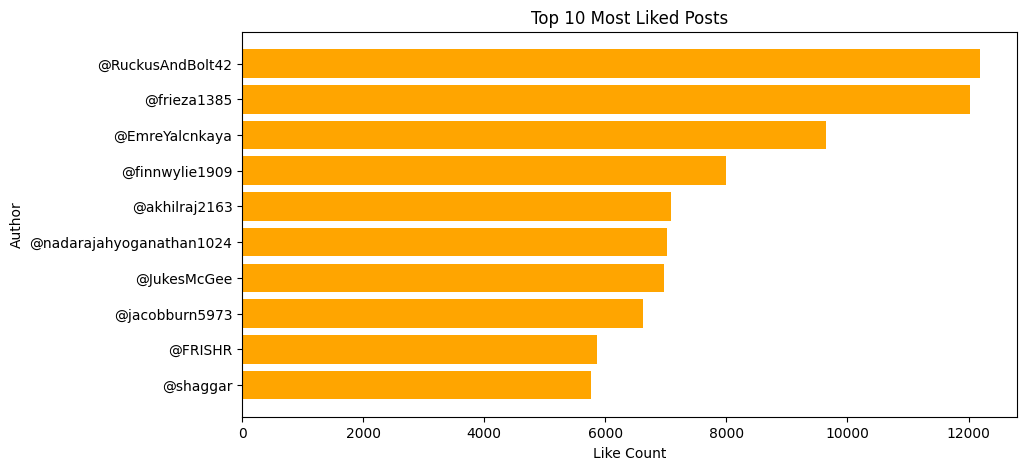

In [10]:
# Analyze user engagement based on like counts
df['like_count'] = df['like_count'].fillna(0)
top_liked = df.sort_values(by='like_count', ascending=False).head(10)

# Plot bar chart for top liked posts
plt.figure(figsize=(10, 5))
plt.barh(top_liked['author'], top_liked['like_count'], color='orange')
plt.xlabel("Like Count")
plt.ylabel("Author")
plt.title("Top 10 Most Liked Posts")
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


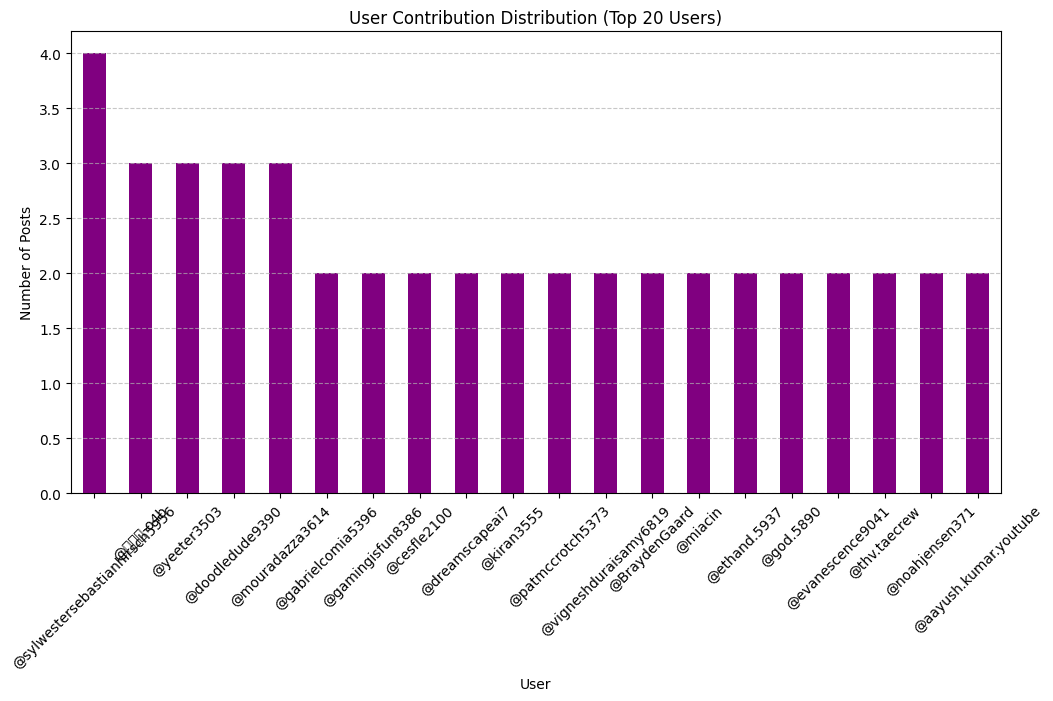

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Count posts per user
user_contributions = df['author'].value_counts()

# Plot User Contribution Distribution
plt.figure(figsize=(12, 6))
user_contributions[:20].plot(kind='bar', color='purple')  # Show top 20 contributors

# Formatting the plot
plt.xlabel("User")
plt.ylabel("Number of Posts")
plt.title("User Contribution Distribution (Top 20 Users)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


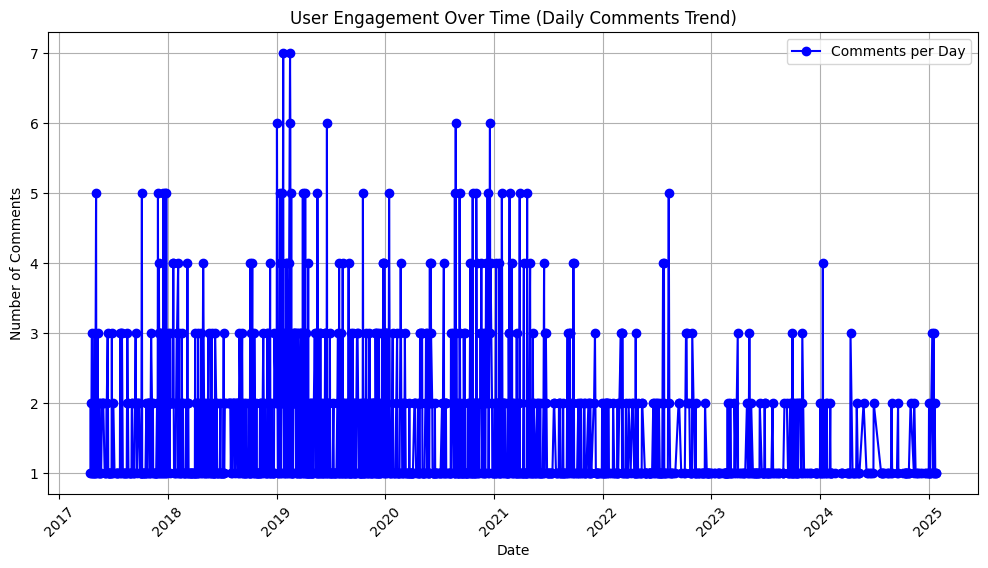

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'published_at' to datetime format
df['published_at'] = pd.to_datetime(df['published_at'])

# Aggregate the number of comments per day
daily_comments = df.groupby(df['published_at'].dt.date).size()

# Plot user engagement over time
plt.figure(figsize=(12, 6))
plt.plot(daily_comments.index, daily_comments.values, marker='o', linestyle='-', color='b', label="Comments per Day")

# Format plot
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.title("User Engagement Over Time (Daily Comments Trend)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Content Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


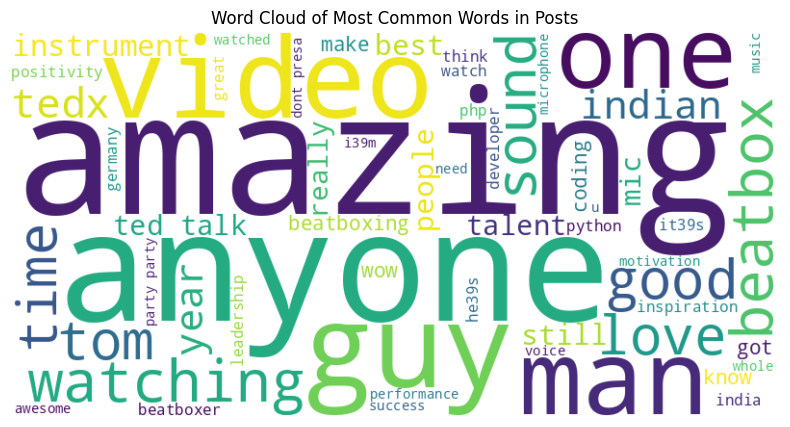

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load English stopwords
custom_stopwords = set(stopwords.words('english'))

# Preprocess text
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return words

# Apply text processing
df['clean_words'] = df['text'].apply(clean_text)

# Flatten the list of words
all_words = [word for sublist in df['clean_words'] for word in sublist]

# Join words to form a single string
text_data = ' '.join(all_words)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Most Common Words in Posts")
plt.show()



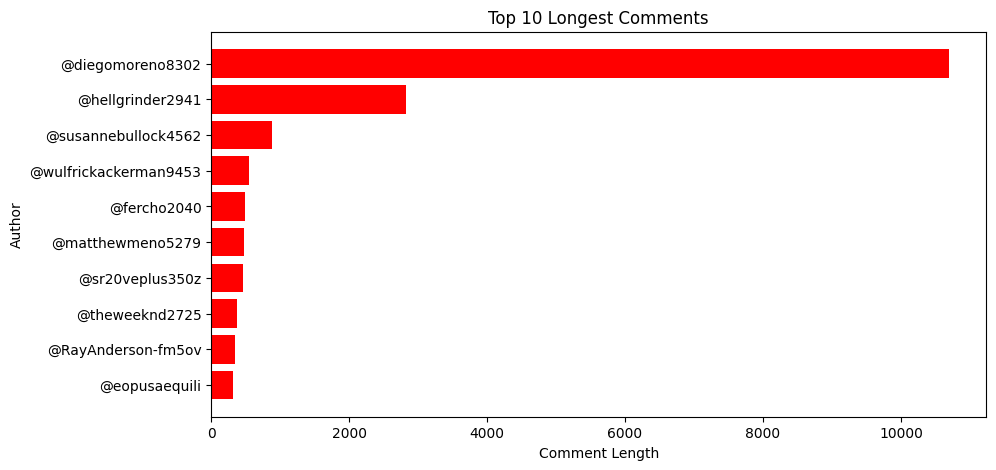

In [12]:
# Add column for comment length
df['comment_length'] = df['text'].apply(lambda x: len(str(x)))

# Get top 10 longest comments
top_longest = df.sort_values(by='comment_length', ascending=False).head(10)

# Plot bar chart for longest comments
plt.figure(figsize=(10, 5))
plt.barh(top_longest['author'], top_longest['comment_length'], color='red')
plt.xlabel("Comment Length")
plt.ylabel("Author")
plt.title("Top 10 Longest Comments")
plt.gca().invert_yaxis()
plt.show()


<ipython-input-21-abd2fbc8d83a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['content_length_category'], palette="coolwarm")


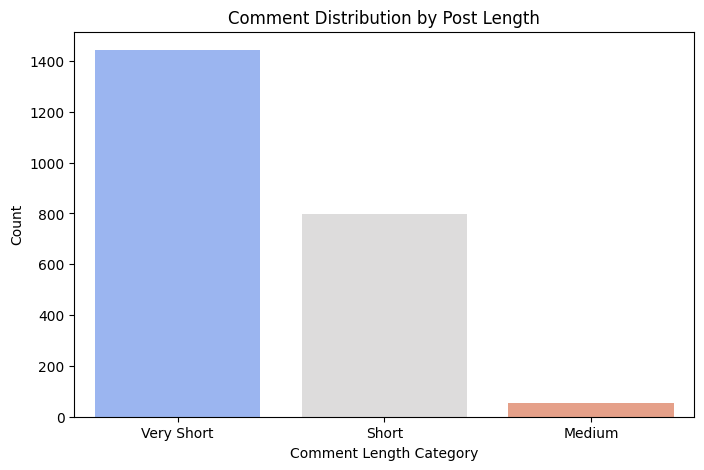

In [21]:
# Categorizing posts by length
df['content_length_category'] = pd.cut(df['comment_length'], bins=[0, 50, 150, 300],
                                       labels=['Very Short', 'Short', 'Medium'])

# Plot distribution of content length
plt.figure(figsize=(8, 5))
sns.countplot(x=df['content_length_category'], palette="coolwarm")
plt.xlabel("Comment Length Category")
plt.ylabel("Count")
plt.title("Comment Distribution by Post Length")
plt.show()
